Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5055 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3787 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2967 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2815 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2711 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2491 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

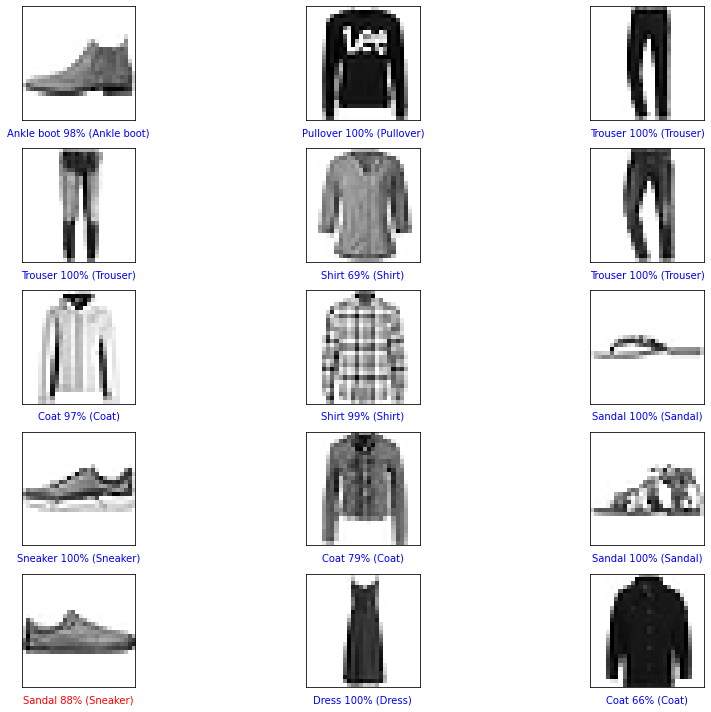

In [7]:
# Import necessary modules
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data by scaling pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 2D array into 1D
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes, using softmax activation
])

print(model.summary())

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

# Evaluate accuracy on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_images)

# Function to plot image and prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Plot some test images with their predicted labels
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()
